# More EDA and Modeling on Combined DataFrames

Now that we have an entity dataframe, a Preqin dataframe, and a UN PRI dataframe, we can merge them together and create a model that indicates whether a firm is like an impact firm without necessarily going through a formal affiliation process.

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [309]:
pd.set_option('display.max_columns', 200)

In [310]:
combined_df = pd.read_csv('.\datasets\entity_concord.csv')

Since I saved my dataframe to a csv before cleaning, I'll finish the job here...

In [311]:
#import preqin_names as new col to combined_df 
combined_df.rename(columns = {'Firm Name':'Preqin Official'}, inplace = True)
combined_df.tail()

,Unnamed: 0,preqin,score,unpri match,Preqin Official,preqin_clean
3859,3859,l&r capital,0.818182,NaN,L&R Capital,l&r capital
3860,3860,institutional investment partners denmark,0.705882,NaN,Institutional Investment Partners Denmark,institutional investment partners denmark
3861,3861,yellowdog,0.413793,NaN,Yellowdog,yellowdog
3862,3862,noles properties,0.592593,NaN,Noles Properties,noles properties
3863,3863,agbe capital,0.846154,NaN,AGBE Capital,agbe capital


In [312]:
entities = pd.read_csv('./datasets/PRI_urls.csv')
unpri_names = entities['name'].str.lower()

In [313]:
#combine cleaned name with original name for unpri
entities['unpri_clean'] = unpri_names
unpri_merge = entities.drop('id',axis=1)
unpri_merge.tail()

,name,unpri_clean
1801,Ysios Capital,ysios capital
1802,Zadig,zadig
1803,Zouk Capital,zouk capital
1804,Zürcher Kantonalbank,zürcher kantonalbank
1805,Zurich Insurance Group,zurich insurance group


In [314]:
#combine cleaned name with original name for unpri
entities['unpri_clean'] = unpri_names
unpri_merge = entities.drop('id',axis=1)
unpri_merge.tail()

,name,unpri_clean
1801,Ysios Capital,ysios capital
1802,Zadig,zadig
1803,Zouk Capital,zouk capital
1804,Zürcher Kantonalbank,zürcher kantonalbank
1805,Zurich Insurance Group,zurich insurance group


In [315]:
combined_df = pd.merge(combined_df,unpri_merge,how='inner',left_on = 'unpri match', right_on = 'unpri_clean')
combined_df.sort_values('score',ascending=True).head()

,Unnamed: 0,preqin,score,unpri match,Preqin Official,preqin_clean,name,unpri_clean
37,271,kbc asset management,0.930233,kbc asset management nv,KBC Asset Management,kbc asset management,KBC Asset Management NV,kbc asset management nv
476,3079,delcap asset management,0.930233,ecp asset management,Delcap Asset Management,delcap asset management,ECP Asset Management,ecp asset management
385,2230,securis investment partners,0.931034,securis investment partners llp,Securis Investment Partners,securis investment partners,Securis Investment Partners LLP,securis investment partners llp
387,2254,causeway capital management,0.931034,causeway capital management llc,Causeway Capital Management,causeway capital management,Causeway Capital Management LLC,causeway capital management llc
312,1843,deerpath capital management,0.931034,"deerpath capital management, lp",Deerpath Capital Management,deerpath capital management,"Deerpath Capital Management, LP","deerpath capital management, lp"


In [316]:
combined_df = combined_df.rename(columns = {'name':'UN PRI Official'})
combined_df.head()

,Unnamed: 0,preqin,score,unpri match,Preqin Official,preqin_clean,UN PRI Official,unpri_clean
0,2,access capital partners,1.0,access capital partners,Access Capital Partners,access capital partners,Access Capital Partners,access capital partners
1,5,pinebridge investments,1.0,pinebridge investments,PineBridge Investments,pinebridge investments,PineBridge Investments,pinebridge investments
2,7,ardian,1.0,ardian,Ardian,ardian,Ardian,ardian
3,10,coller capital,1.0,coller capital,Coller Capital,coller capital,Coller Capital,coller capital
4,11,gcm grosvenor,1.0,gcm grosvenor,GCM Grosvenor,gcm grosvenor,GCM Grosvenor,gcm grosvenor


In [317]:
combined_df = combined_df.drop('preqin',axis=1)
combined_df.head()

,Unnamed: 0,score,unpri match,Preqin Official,preqin_clean,UN PRI Official,unpri_clean
0,2,1.0,access capital partners,Access Capital Partners,access capital partners,Access Capital Partners,access capital partners
1,5,1.0,pinebridge investments,PineBridge Investments,pinebridge investments,PineBridge Investments,pinebridge investments
2,7,1.0,ardian,Ardian,ardian,Ardian,ardian
3,10,1.0,coller capital,Coller Capital,coller capital,Coller Capital,coller capital
4,11,1.0,gcm grosvenor,GCM Grosvenor,gcm grosvenor,GCM Grosvenor,gcm grosvenor


In [318]:
combined_df = combined_df.drop('unpri match',axis=1)
combined_df.head()

,Unnamed: 0,score,Preqin Official,preqin_clean,UN PRI Official,unpri_clean
0,2,1.0,Access Capital Partners,access capital partners,Access Capital Partners,access capital partners
1,5,1.0,PineBridge Investments,pinebridge investments,PineBridge Investments,pinebridge investments
2,7,1.0,Ardian,ardian,Ardian,ardian
3,10,1.0,Coller Capital,coller capital,Coller Capital,coller capital
4,11,1.0,GCM Grosvenor,gcm grosvenor,GCM Grosvenor,gcm grosvenor


Finally, have a clean entity list with original and clean names plus matching score.

In [319]:
combined_df = combined_df[['Preqin Official','preqin_clean', 'UN PRI Official', 'unpri_clean', 'score']]
combined_df.sort_values('score',ascending=True).head()

,Preqin Official,preqin_clean,UN PRI Official,unpri_clean,score
37,KBC Asset Management,kbc asset management,KBC Asset Management NV,kbc asset management nv,0.930233
476,Delcap Asset Management,delcap asset management,ECP Asset Management,ecp asset management,0.930233
385,Securis Investment Partners,securis investment partners,Securis Investment Partners LLP,securis investment partners llp,0.931034
387,Causeway Capital Management,causeway capital management,Causeway Capital Management LLC,causeway capital management llc,0.931034
312,Deerpath Capital Management,deerpath capital management,"Deerpath Capital Management, LP","deerpath capital management, lp",0.931034


Now its time to merge the two datasets

In [320]:
#import preqin data 
unpri_data = pd.read_csv('./datasets/survey_test3.csv')
unpri_data.head()

,Unnamed: 0,Policy setting out your overall approach,Formalised guidelines on environmental factors,Formalised guidelines on social factors,Formalised guidelines on corporate governance factors,Fiduciary (or equivalent) duties,Asset class-specific RI guidelines,Sector specific RI guidelines,Screening / exclusions policy,"Other, specify (1)","Other, specify(2)",Applicable policies cover all AUM,Applicable policies cover a majority of AUM,Applicable policies cover a minority of AUM,Your organisation’s definition of ESG and/or responsible investment and it’s relation to investments,Your investment objectives that take ESG factors/real economy influence into account,Time horizon of your investment,Governance structure of organisational ESG responsibilities,ESG incorporation approaches,Active ownership approaches,Reporting,Climate change,Understanding and incorporating client / beneficiary sustainability preferences,"Other RI considerations, specify (1)","Other RI considerations, specify (2)",No,I confirm I have read and understood the Accountability tab for SG 01,URL,Attachment (will be made public),We do not publicly disclose our investment policy documents,Attachment,We do not publicly disclose any investment policy components,Board members or trustees,Oversight/accountability for responsible investment,Implementation of responsible investment,No oversight/accountability or implementation responsibility for responsible investment,Internal Roles (triggers other options),"Chief Executive Officer (CEO), Chief Investment Officer (CIO), Chief Operating Officer (COO), Investment Committee","Other Chief-level staff or head of department, specify",Portfolio managers,Investment analysts,Dedicated responsible investment staff,Investor relations,"Other role, specify (1)","Other role, specify (2)",External managers or service providers,I confirm I have read and understood the Accountability tab for SG 07,Principles for Responsible Investment,Basic Moderate Advanced,Asian Corporate Governance Association,Australian Council of Superannuation Investors,AFIC – La Commission ESG,BVCA – Responsible Investment Advisory Board,CDP Climate Change,CDP Forests,CDP Water,CFA Institute Centre for Financial Market Integrity,Code for Responsible Investment in SA (CRISA),Code for Responsible Finance in the 21st Century,Council of Institutional Investors (CII),Eumedion,Extractive Industries Transparency Initiative (EITI),ESG Research Australia,Invest Europe Responsible Investment Roundtable,Global Investors Governance Network (GIGN),Global Impact Investing Network (GIIN),Global Real Estate Sustainability Benchmark (GRESB),Green Bond Principles,Institutional Investors Group on Climate Change (IIGCC),Interfaith Center on Corporate Responsibility (ICCR),International Corporate Governance Network (ICGN),"Investor Group on Climate Change, Australia/New Zealand (IGCC)",International Integrated Reporting Council (IIRC),Investor Network on Climate Risk (INCR)/CERES,Local Authority Pension Fund Forum,Principles for Sustainable Insurance,"Regional or National Social Investment Forums (e.g. UKSIF, Eurosif, ASRIA, RIAA), specify",Responsible Finance Principles in Inclusive Finance,Shareholder Association for Research and Education (Share),United Nations Environmental Program Finance Initiative (UNEP FI),United Nations Global Compact,"Other collaborative organisation/initiative, specify","Provided or supported education or training programmes (this includes peer to peer RI support) Your education or training may be for clients, investment managers, actuaries, broker/dealers, investment consultants, legal advisers etc.)",Quarterly or more frequently,Biannually,Annually,Less frequently than annually,Ad hoc,Other,Provided financial support for academic or industry research on responsible investment,Provided input and/or collaborated with academia on RI related work,Encouraged better transparency and disclosure of responsible investment practices across the investment indust

In [321]:
combined_df = pd.merge(combined_df,unpri_data,how='inner',left_on = 'UN PRI Official', right_on = 'Unnamed: 0')
combined_df.head()

,Preqin Official,preqin_clean,UN PRI Official,unpri_clean,score,Unnamed: 0,Policy setting out your overall approach,Formalised guidelines on environmental factors,Formalised guidelines on social factors,Formalised guidelines on corporate governance factors,Fiduciary (or equivalent) duties,Asset class-specific RI guidelines,Sector specific RI guidelines,Screening / exclusions policy,"Other, specify (1)","Other, specify(2)",Applicable policies cover all AUM,Applicable policies cover a majority of AUM,Applicable policies cover a minority of AUM,Your organisation’s definition of ESG and/or responsible investment and it’s relation to investments,Your investment objectives that take ESG factors/real economy influence into account,Time horizon of your investment,Governance structure of organisational ESG responsibilities,ESG incorporation approaches,Active ownership approaches,Reporting,Climate change,Understanding and incorporating client / beneficiary sustainability preferences,"Other RI considerations, specify (1)","Other RI considerations, specify (2)",No,I confirm I have read and understood the Accountability tab for SG 01,URL,Attachment (will be made public),We do not publicly disclose our investment policy documents,Attachment,We do not publicly disclose any investment policy components,Board members or trustees,Oversight/accountability for responsible investment,Implementation of responsible investment,No oversight/accountability or implementation responsibility for responsible investment,Internal Roles (triggers other options),"Chief Executive Officer (CEO), Chief Investment Officer (CIO), Chief Operating Officer (COO), Investment Committee","Other Chief-level staff or head of department, specify",Portfolio managers,Investment analysts,Dedicated responsible investment staff,Investor relations,"Other role, specify (1)","Other role, specify (2)",External managers or service providers,I confirm I have read and understood the Accountability tab for SG 07,Principles for Responsible Investment,Basic Moderate Advanced,Asian Corporate Governance Association,Australian Council of Superannuation Investors,AFIC – La Commission ESG,BVCA – Responsible Investment Advisory Board,CDP Climate Change,CDP Forests,CDP Water,CFA Institute Centre for Financial Market Integrity,Code for Responsible Investment in SA (CRISA),Code for Responsible Finance in the 21st Century,Council of Institutional Investors (CII),Eumedion,Extractive Industries Transparency Initiative (EITI),ESG Research Australia,Invest Europe Responsible Investment Roundtable,Global Investors Governance Network (GIGN),Global Impact Investing Network (GIIN),Global Real Estate Sustainability Benchmark (GRESB),Green Bond Principles,Institutional Investors Group on Climate Change (IIGCC),Interfaith Center on Corporate Responsibility (ICCR),International Corporate Governance Network (ICGN),"Investor Group on Climate Change, Australia/New Zealand (IGCC)",International Integrated Reporting Council (IIRC),Investor Network on Climate Risk (INCR)/CERES,Local Authority Pension Fund Forum,Principles for Sustainable Insurance,"Regional or National Social Investment Forums (e.g. UKSIF, Eurosif, ASRIA, RIAA), specify",Responsible Finance Principles in Inclusive Finance,Shareholder Association for Research and Education (Share),United Nations Environmental Program Finance Initiative (UNEP FI),United Nations Global Compact,"Other collaborative organisation/initiative, specify","Provided or supported education or training programmes (this includes peer to peer RI support) Your education or training may be for clients, investment managers, actuaries, broker/dealers, investment consultants, legal advisers etc.)",Quarterly or more frequently,Biannually,Annually,Less frequently than annually,Ad hoc,Other,Provided financial support for academic or industry research on responsible investment,Provided input and/or collaborated with academia on RI related work,Encouraged better transparency and disclosure o

In [322]:
combined_df = combined_df.drop('Unnamed: 0',axis=1)
combined_df.head()

,Preqin Official,preqin_clean,UN PRI Official,unpri_clean,score,Policy setting out your overall approach,Formalised guidelines on environmental factors,Formalised guidelines on social factors,Formalised guidelines on corporate governance factors,Fiduciary (or equivalent) duties,Asset class-specific RI guidelines,Sector specific RI guidelines,Screening / exclusions policy,"Other, specify (1)","Other, specify(2)",Applicable policies cover all AUM,Applicable policies cover a majority of AUM,Applicable policies cover a minority of AUM,Your organisation’s definition of ESG and/or responsible investment and it’s relation to investments,Your investment objectives that take ESG factors/real economy influence into account,Time horizon of your investment,Governance structure of organisational ESG responsibilities,ESG incorporation approaches,Active ownership approaches,Reporting,Climate change,Understanding and incorporating client / beneficiary sustainability preferences,"Other RI considerations, specify (1)","Other RI considerations, specify (2)",No,I confirm I have read and understood the Accountability tab for SG 01,URL,Attachment (will be made public),We do not publicly disclose our investment policy documents,Attachment,We do not publicly disclose any investment policy components,Board members or trustees,Oversight/accountability for responsible investment,Implementation of responsible investment,No oversight/accountability or implementation responsibility for responsible investment,Internal Roles (triggers other options),"Chief Executive Officer (CEO), Chief Investment Officer (CIO), Chief Operating Officer (COO), Investment Committee","Other Chief-level staff or head of department, specify",Portfolio managers,Investment analysts,Dedicated responsible investment staff,Investor relations,"Other role, specify (1)","Other role, specify (2)",External managers or service providers,I confirm I have read and understood the Accountability tab for SG 07,Principles for Responsible Investment,Basic Moderate Advanced,Asian Corporate Governance Association,Australian Council of Superannuation Investors,AFIC – La Commission ESG,BVCA – Responsible Investment Advisory Board,CDP Climate Change,CDP Forests,CDP Water,CFA Institute Centre for Financial Market Integrity,Code for Responsible Investment in SA (CRISA),Code for Responsible Finance in the 21st Century,Council of Institutional Investors (CII),Eumedion,Extractive Industries Transparency Initiative (EITI),ESG Research Australia,Invest Europe Responsible Investment Roundtable,Global Investors Governance Network (GIGN),Global Impact Investing Network (GIIN),Global Real Estate Sustainability Benchmark (GRESB),Green Bond Principles,Institutional Investors Group on Climate Change (IIGCC),Interfaith Center on Corporate Responsibility (ICCR),International Corporate Governance Network (ICGN),"Investor Group on Climate Change, Australia/New Zealand (IGCC)",International Integrated Reporting Council (IIRC),Investor Network on Climate Risk (INCR)/CERES,Local Authority Pension Fund Forum,Principles for Sustainable Insurance,"Regional or National Social Investment Forums (e.g. UKSIF, Eurosif, ASRIA, RIAA), specify",Responsible Finance Principles in Inclusive Finance,Shareholder Association for Research and Education (Share),United Nations Environmental Program Finance Initiative (UNEP FI),United Nations Global Compact,"Other collaborative organisation/initiative, specify","Provided or supported education or training programmes (this includes peer to peer RI support) Your education or training may be for clients, investment managers, actuaries, broker/dealers, investment consultants, legal advisers etc.)",Quarterly or more frequently,Biannually,Annually,Less frequently than annually,Ad hoc,Other,Provided financial support for academic or industry research on responsible investment,Provided input and/or collaborated with academia on RI related work,Encouraged better transparency and disclosure of responsib

In [323]:
preqin_data = pd.read_csv('./datasets/preqin_esg.csv')
preqin_data.head()

,Firm ID,Firm Name,GP or LP,Firm Type,Firm Country,Firm Region,ESG Status,ESG Policy Date Established,Impact Investing,ESG Status Date Established,General Policy Applied to Asset Classes,Asset class specific Policy,Asset class specific Policy 2,Asset class specific Policy 3,Socially Responsible Investment,ESG Policy URL,Additional Information,Active On Pro,Internal note date,Internal note update type,Internal note note type,Asia Investor Group on Climate Change,Asian Corporate Governance Association,Australian Council of Superannuation Investors,Carbon Disclosure Project (Formerly),Ceres,Climate Action 100+,Council of Institutional Investors,ESG Research Austrailia,Eumedion,Eurosif,FAIRR,Global Impact Investing Network,Global Real Estate Sustainability Benchmark – Infrastructure,Global Real Estate Sustainability Benchmark – Real Estate,IFC Operating Principles for Impact Management,Institutional Investors Group on Climate Change,Interfaith Center on Corporate Responsibility,International Corporate Governance Network,Invest Europe Responsible Investment Roundtable,Investor Group on Climate Change,Local Authority Pension Fund Forum,Principles for Responsible Investment (PRI),Responsible Investment Association (RIA),Responsible Investment Association Australia,Sustainability Accounting Standards Board,Task Force on Climate-related Financial Disclosures,UK Sustainable Investment and Finance Association,United Nations Environment Programme Finance Initiative,United Nations Global Compact,US SIF,ESG Sub Policies Type,ESG Sub Policies Date,ESG Sub Policies Policy Link,Sub Policy 2,Sub Policy 3,Dupes?
0,12358,Private Advisors,LP,Fund of Hedge Funds Manager,US,North America,Yes,NaN,Unknown,NaN,HF,PE,NaN,NaN,NaN,NaN,Private Advisors has shown a commitment to ESG...,HF,43697.0,Partial Update,Web Research,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,12358,Private Advisors,GP,Fund of Hedge Funds Manager,US,North America,Yes,NaN,Unknown,NaN,HF,NaN,NaN,NaN,No,https://www.cliens.se/ansvarsfulla-investeringar,NaN,HF,43766.0,Full Update,Email Communication,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,15081,TKP Investments,LP,Fund of Hedge Funds Manager,Netherlands,West Europe,Pending,38718.0,No,NaN,HF,RE,NaN,NaN,NaN,https://tkpinvestments.com/wp-content/uploads/...,TKP Investments incorporates ESG via its paren...,HF,43693.0,Partial Update,Web Research,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,15081,TKP Investments,GP,Fund of Hedge Funds Manager,Netherlands,West Europe,Pending,38718.0,No,NaN,HF,NaN,NaN,NaN,NaN,NaN,NaN,"PE,VC,HF",NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,15,Access Capital Partners,LP,Private Equity Fund of Funds Manager,France,West Europe,Yes,39083.0,No,43466.0,"PE, INF, PD, VC",NaN,NaN,NaN,Yes,https://www.access-capital-partners.com/upload...,Access Capital Partners started its engagement...,"PE, INF, PD, NR, VC",43693.0,Partial Update,Web Research,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [324]:
combined_df = pd.merge(combined_df,preqin_data,how='inner',left_on = 'Preqin Official', right_on = 'Firm Name')
combined_df.head()

,Preqin Official,preqin_clean,UN PRI Official,unpri_clean,score,Policy setting out your overall approach,Formalised guidelines on environmental factors,Formalised guidelines on social factors,Formalised guidelines on corporate governance factors,Fiduciary (or equivalent) duties,Asset class-specific RI guidelines,Sector specific RI guidelines,Screening / exclusions policy,"Other, specify (1)","Other, specify(2)",Applicable policies cover all AUM,Applicable policies cover a majority of AUM,Applicable policies cover a minority of AUM,Your organisation’s definition of ESG and/or responsible investment and it’s relation to investments,Your investment objectives that take ESG factors/real economy influence into account,Time horizon of your investment,Governance structure of organisational ESG responsibilities,ESG incorporation approaches,Active ownership approaches,Reporting,Climate change,Understanding and incorporating client / beneficiary sustainability preferences,"Other RI considerations, specify (1)","Other RI considerations, specify (2)",No,I confirm I have read and understood the Accountability tab for SG 01,URL,Attachment (will be made public),We do not publicly disclose our investment policy documents,Attachment,We do not publicly disclose any investment policy components,Board members or trustees,Oversight/accountability for responsible investment,Implementation of responsible investment,No oversight/accountability or implementation responsibility for responsible investment,Internal Roles (triggers other options),"Chief Executive Officer (CEO), Chief Investment Officer (CIO), Chief Operating Officer (COO), Investment Committee","Other Chief-level staff or head of department, specify",Portfolio managers,Investment analysts,Dedicated responsible investment staff,Investor relations,"Other role, specify (1)","Other role, specify (2)",External managers or service providers,I confirm I have read and understood the Accountability tab for SG 07,Principles for Responsible Investment,Basic Moderate Advanced,Asian Corporate Governance Association_x,Australian Council of Superannuation Investors_x,AFIC – La Commission ESG,BVCA – Responsible Investment Advisory Board,CDP Climate Change,CDP Forests,CDP Water,CFA Institute Centre for Financial Market Integrity,Code for Responsible Investment in SA (CRISA),Code for Responsible Finance in the 21st Century,Council of Institutional Investors (CII),Eumedion_x,Extractive Industries Transparency Initiative (EITI),ESG Research Australia,Invest Europe Responsible Investment Roundtable_x,Global Investors Governance Network (GIGN),Global Impact Investing Network (GIIN),Global Real Estate Sustainability Benchmark (GRESB),Green Bond Principles,Institutional Investors Group on Climate Change (IIGCC),Interfaith Center on Corporate Responsibility (ICCR),International Corporate Governance Network (ICGN),"Investor Group on Climate Change, Australia/New Zealand (IGCC)",International Integrated Reporting Council (IIRC),Investor Network on Climate Risk (INCR)/CERES,Local Authority Pension Fund Forum_x,Principles for Sustainable Insurance,"Regional or National Social Investment Forums (e.g. UKSIF, Eurosif, ASRIA, RIAA), specify",Responsible Finance Principles in Inclusive Finance,Shareholder Association for Research and Education (Share),United Nations Environmental Program Finance Initiative (UNEP FI),United Nations Global Compact_x,"Other collaborative organisation/initiative, specify","Provided or supported education or training programmes (this includes peer to peer RI support) Your education or training may be for clients, investment managers, actuaries, broker/dealers, investment consultants, legal advisers etc.)",Quarterly or more frequently,Biannually,Annually,Less frequently than annually,Ad hoc,Other,Provided financial support for academic or industry research on responsible investment,Provided input and/or collaborated with academia on RI related work,Encouraged better transparency and disclosure 

In [325]:
combined_df = combined_df.drop('Firm Name',axis=1)
combined_df.head()

,Preqin Official,preqin_clean,UN PRI Official,unpri_clean,score,Policy setting out your overall approach,Formalised guidelines on environmental factors,Formalised guidelines on social factors,Formalised guidelines on corporate governance factors,Fiduciary (or equivalent) duties,Asset class-specific RI guidelines,Sector specific RI guidelines,Screening / exclusions policy,"Other, specify (1)","Other, specify(2)",Applicable policies cover all AUM,Applicable policies cover a majority of AUM,Applicable policies cover a minority of AUM,Your organisation’s definition of ESG and/or responsible investment and it’s relation to investments,Your investment objectives that take ESG factors/real economy influence into account,Time horizon of your investment,Governance structure of organisational ESG responsibilities,ESG incorporation approaches,Active ownership approaches,Reporting,Climate change,Understanding and incorporating client / beneficiary sustainability preferences,"Other RI considerations, specify (1)","Other RI considerations, specify (2)",No,I confirm I have read and understood the Accountability tab for SG 01,URL,Attachment (will be made public),We do not publicly disclose our investment policy documents,Attachment,We do not publicly disclose any investment policy components,Board members or trustees,Oversight/accountability for responsible investment,Implementation of responsible investment,No oversight/accountability or implementation responsibility for responsible investment,Internal Roles (triggers other options),"Chief Executive Officer (CEO), Chief Investment Officer (CIO), Chief Operating Officer (COO), Investment Committee","Other Chief-level staff or head of department, specify",Portfolio managers,Investment analysts,Dedicated responsible investment staff,Investor relations,"Other role, specify (1)","Other role, specify (2)",External managers or service providers,I confirm I have read and understood the Accountability tab for SG 07,Principles for Responsible Investment,Basic Moderate Advanced,Asian Corporate Governance Association_x,Australian Council of Superannuation Investors_x,AFIC – La Commission ESG,BVCA – Responsible Investment Advisory Board,CDP Climate Change,CDP Forests,CDP Water,CFA Institute Centre for Financial Market Integrity,Code for Responsible Investment in SA (CRISA),Code for Responsible Finance in the 21st Century,Council of Institutional Investors (CII),Eumedion_x,Extractive Industries Transparency Initiative (EITI),ESG Research Australia,Invest Europe Responsible Investment Roundtable_x,Global Investors Governance Network (GIGN),Global Impact Investing Network (GIIN),Global Real Estate Sustainability Benchmark (GRESB),Green Bond Principles,Institutional Investors Group on Climate Change (IIGCC),Interfaith Center on Corporate Responsibility (ICCR),International Corporate Governance Network (ICGN),"Investor Group on Climate Change, Australia/New Zealand (IGCC)",International Integrated Reporting Council (IIRC),Investor Network on Climate Risk (INCR)/CERES,Local Authority Pension Fund Forum_x,Principles for Sustainable Insurance,"Regional or National Social Investment Forums (e.g. UKSIF, Eurosif, ASRIA, RIAA), specify",Responsible Finance Principles in Inclusive Finance,Shareholder Association for Research and Education (Share),United Nations Environmental Program Finance Initiative (UNEP FI),United Nations Global Compact_x,"Other collaborative organisation/initiative, specify","Provided or supported education or training programmes (this includes peer to peer RI support) Your education or training may be for clients, investment managers, actuaries, broker/dealers, investment consultants, legal advisers etc.)",Quarterly or more frequently,Biannually,Annually,Less frequently than annually,Ad hoc,Other,Provided financial support for academic or industry research on responsible investment,Provided input and/or collaborated with academia on RI related work,Encouraged better transparency and disclosure 

In [326]:
# combined_df.to_csv(r'C:\Users\michael.amenta\DAT_MA\datasets\preqin_unpri.csv')

With combined df, now want to focus only on Investment Managers (GPs), not Investors (LPs)

In [327]:
gp_score = combined_df.loc[combined_df['GP or LP'] == 'GP']
gp_score.shape

(548, 184)

In [328]:
gp_score.head()

,Preqin Official,preqin_clean,UN PRI Official,unpri_clean,score,Policy setting out your overall approach,Formalised guidelines on environmental factors,Formalised guidelines on social factors,Formalised guidelines on corporate governance factors,Fiduciary (or equivalent) duties,Asset class-specific RI guidelines,Sector specific RI guidelines,Screening / exclusions policy,"Other, specify (1)","Other, specify(2)",Applicable policies cover all AUM,Applicable policies cover a majority of AUM,Applicable policies cover a minority of AUM,Your organisation’s definition of ESG and/or responsible investment and it’s relation to investments,Your investment objectives that take ESG factors/real economy influence into account,Time horizon of your investment,Governance structure of organisational ESG responsibilities,ESG incorporation approaches,Active ownership approaches,Reporting,Climate change,Understanding and incorporating client / beneficiary sustainability preferences,"Other RI considerations, specify (1)","Other RI considerations, specify (2)",No,I confirm I have read and understood the Accountability tab for SG 01,URL,Attachment (will be made public),We do not publicly disclose our investment policy documents,Attachment,We do not publicly disclose any investment policy components,Board members or trustees,Oversight/accountability for responsible investment,Implementation of responsible investment,No oversight/accountability or implementation responsibility for responsible investment,Internal Roles (triggers other options),"Chief Executive Officer (CEO), Chief Investment Officer (CIO), Chief Operating Officer (COO), Investment Committee","Other Chief-level staff or head of department, specify",Portfolio managers,Investment analysts,Dedicated responsible investment staff,Investor relations,"Other role, specify (1)","Other role, specify (2)",External managers or service providers,I confirm I have read and understood the Accountability tab for SG 07,Principles for Responsible Investment,Basic Moderate Advanced,Asian Corporate Governance Association_x,Australian Council of Superannuation Investors_x,AFIC – La Commission ESG,BVCA – Responsible Investment Advisory Board,CDP Climate Change,CDP Forests,CDP Water,CFA Institute Centre for Financial Market Integrity,Code for Responsible Investment in SA (CRISA),Code for Responsible Finance in the 21st Century,Council of Institutional Investors (CII),Eumedion_x,Extractive Industries Transparency Initiative (EITI),ESG Research Australia,Invest Europe Responsible Investment Roundtable_x,Global Investors Governance Network (GIGN),Global Impact Investing Network (GIIN),Global Real Estate Sustainability Benchmark (GRESB),Green Bond Principles,Institutional Investors Group on Climate Change (IIGCC),Interfaith Center on Corporate Responsibility (ICCR),International Corporate Governance Network (ICGN),"Investor Group on Climate Change, Australia/New Zealand (IGCC)",International Integrated Reporting Council (IIRC),Investor Network on Climate Risk (INCR)/CERES,Local Authority Pension Fund Forum_x,Principles for Sustainable Insurance,"Regional or National Social Investment Forums (e.g. UKSIF, Eurosif, ASRIA, RIAA), specify",Responsible Finance Principles in Inclusive Finance,Shareholder Association for Research and Education (Share),United Nations Environmental Program Finance Initiative (UNEP FI),United Nations Global Compact_x,"Other collaborative organisation/initiative, specify","Provided or supported education or training programmes (this includes peer to peer RI support) Your education or training may be for clients, investment managers, actuaries, broker/dealers, investment consultants, legal advisers etc.)",Quarterly or more frequently,Biannually,Annually,Less frequently than annually,Ad hoc,Other,Provided financial support for academic or industry research on responsible investment,Provided input and/or collaborated with academia on RI related work,Encouraged better transparency and disclosure 

Want new column for count of ESG Affiliations since I don't know whether one is superior to another.

In [329]:
gp_score['affiliation_count'] = gp_score[['Asia Investor Group on Climate Change',	'Asian Corporate Governance Association_y',	'Australian Council of Superannuation Investors_y',	'Carbon Disclosure Project (Formerly)',	'Ceres',	'Climate Action 100+',	'Council of Institutional Investors',	'ESG Research Austrailia',	'Eumedion_y',	'Eurosif',	'FAIRR',	'Global Impact Investing Network',	'Global Real Estate Sustainability Benchmark – Infrastructure',	'Global Real Estate Sustainability Benchmark – Real Estate',	'IFC Operating Principles for Impact Management',	'Institutional Investors Group on Climate Change',	'Interfaith Center on Corporate Responsibility',	'International Corporate Governance Network',	'Invest Europe Responsible Investment Roundtable_y',	'Investor Group on Climate Change',	'Local Authority Pension Fund Forum_y',	'Principles for Responsible Investment (PRI)',	'Responsible Investment Association (RIA)',	'Responsible Investment Association Australia',	'Sustainability Accounting Standards Board',	'Task Force on Climate-related Financial Disclosures',	'UK Sustainable Investment and Finance Association',	'United Nations Environment Programme Finance Initiative',	'United Nations Global Compact_y',	'US SIF',
]].sum(axis=1)
gp_score.head()

C:\Users\michael.amenta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Preqin Official,preqin_clean,UN PRI Official,unpri_clean,score,Policy setting out your overall approach,Formalised guidelines on environmental factors,Formalised guidelines on social factors,Formalised guidelines on corporate governance factors,Fiduciary (or equivalent) duties,Asset class-specific RI guidelines,Sector specific RI guidelines,Screening / exclusions policy,"Other, specify (1)","Other, specify(2)",Applicable policies cover all AUM,Applicable policies cover a majority of AUM,Applicable policies cover a minority of AUM,Your organisation’s definition of ESG and/or responsible investment and it’s relation to investments,Your investment objectives that take ESG factors/real economy influence into account,Time horizon of your investment,Governance structure of organisational ESG responsibilities,ESG incorporation approaches,Active ownership approaches,Reporting,Climate change,Understanding and incorporating client / beneficiary sustainability preferences,"Other RI considerations, specify (1)","Other RI considerations, specify (2)",No,I confirm I have read and understood the Accountability tab for SG 01,URL,Attachment (will be made public),We do not publicly disclose our investment policy documents,Attachment,We do not publicly disclose any investment policy components,Board members or trustees,Oversight/accountability for responsible investment,Implementation of responsible investment,No oversight/accountability or implementation responsibility for responsible investment,Internal Roles (triggers other options),"Chief Executive Officer (CEO), Chief Investment Officer (CIO), Chief Operating Officer (COO), Investment Committee","Other Chief-level staff or head of department, specify",Portfolio managers,Investment analysts,Dedicated responsible investment staff,Investor relations,"Other role, specify (1)","Other role, specify (2)",External managers or service providers,I confirm I have read and understood the Accountability tab for SG 07,Principles for Responsible Investment,Basic Moderate Advanced,Asian Corporate Governance Association_x,Australian Council of Superannuation Investors_x,AFIC – La Commission ESG,BVCA – Responsible Investment Advisory Board,CDP Climate Change,CDP Forests,CDP Water,CFA Institute Centre for Financial Market Integrity,Code for Responsible Investment in SA (CRISA),Code for Responsible Finance in the 21st Century,Council of Institutional Investors (CII),Eumedion_x,Extractive Industries Transparency Initiative (EITI),ESG Research Australia,Invest Europe Responsible Investment Roundtable_x,Global Investors Governance Network (GIGN),Global Impact Investing Network (GIIN),Global Real Estate Sustainability Benchmark (GRESB),Green Bond Principles,Institutional Investors Group on Climate Change (IIGCC),Interfaith Center on Corporate Responsibility (ICCR),International Corporate Governance Network (ICGN),"Investor Group on Climate Change, Australia/New Zealand (IGCC)",International Integrated Reporting Council (IIRC),Investor Network on Climate Risk (INCR)/CERES,Local Authority Pension Fund Forum_x,Principles for Sustainable Insurance,"Regional or National Social Investment Forums (e.g. UKSIF, Eurosif, ASRIA, RIAA), specify",Responsible Finance Principles in Inclusive Finance,Shareholder Association for Research and Education (Share),United Nations Environmental Program Finance Initiative (UNEP FI),United Nations Global Compact_x,"Other collaborative organisation/initiative, specify","Provided or supported education or training programmes (this includes peer to peer RI support) Your education or training may be for clients, investment managers, actuaries, broker/dealers, investment consultants, legal advisers etc.)",Quarterly or more frequently,Biannually,Annually,Less frequently than annually,Ad hoc,Other,Provided financial support for academic or industry research on responsible investment,Provided input and/or collaborated with academia on RI related work,Encouraged better transparency and disclosure 

In [330]:
#Make similar count column in UN PRI for number of ESG policies
gp_score['policy_coverage'] = gp_score[[
"Your organisation’s definition of ESG and/or responsible investment and it’s relation to investments",	'Your investment objectives that take ESG factors/real economy influence into account',	'Time horizon of your investment',	'Governance structure of organisational ESG responsibilities',	'ESG incorporation approaches',	'Active ownership approaches','Reporting','Climate change','Understanding and incorporating client / beneficiary sustainability preferences'
]].sum(axis=1)
gp_score.head()

C:\Users\michael.amenta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Preqin Official,preqin_clean,UN PRI Official,unpri_clean,score,Policy setting out your overall approach,Formalised guidelines on environmental factors,Formalised guidelines on social factors,Formalised guidelines on corporate governance factors,Fiduciary (or equivalent) duties,Asset class-specific RI guidelines,Sector specific RI guidelines,Screening / exclusions policy,"Other, specify (1)","Other, specify(2)",Applicable policies cover all AUM,Applicable policies cover a majority of AUM,Applicable policies cover a minority of AUM,Your organisation’s definition of ESG and/or responsible investment and it’s relation to investments,Your investment objectives that take ESG factors/real economy influence into account,Time horizon of your investment,Governance structure of organisational ESG responsibilities,ESG incorporation approaches,Active ownership approaches,Reporting,Climate change,Understanding and incorporating client / beneficiary sustainability preferences,"Other RI considerations, specify (1)","Other RI considerations, specify (2)",No,I confirm I have read and understood the Accountability tab for SG 01,URL,Attachment (will be made public),We do not publicly disclose our investment policy documents,Attachment,We do not publicly disclose any investment policy components,Board members or trustees,Oversight/accountability for responsible investment,Implementation of responsible investment,No oversight/accountability or implementation responsibility for responsible investment,Internal Roles (triggers other options),"Chief Executive Officer (CEO), Chief Investment Officer (CIO), Chief Operating Officer (COO), Investment Committee","Other Chief-level staff or head of department, specify",Portfolio managers,Investment analysts,Dedicated responsible investment staff,Investor relations,"Other role, specify (1)","Other role, specify (2)",External managers or service providers,I confirm I have read and understood the Accountability tab for SG 07,Principles for Responsible Investment,Basic Moderate Advanced,Asian Corporate Governance Association_x,Australian Council of Superannuation Investors_x,AFIC – La Commission ESG,BVCA – Responsible Investment Advisory Board,CDP Climate Change,CDP Forests,CDP Water,CFA Institute Centre for Financial Market Integrity,Code for Responsible Investment in SA (CRISA),Code for Responsible Finance in the 21st Century,Council of Institutional Investors (CII),Eumedion_x,Extractive Industries Transparency Initiative (EITI),ESG Research Australia,Invest Europe Responsible Investment Roundtable_x,Global Investors Governance Network (GIGN),Global Impact Investing Network (GIIN),Global Real Estate Sustainability Benchmark (GRESB),Green Bond Principles,Institutional Investors Group on Climate Change (IIGCC),Interfaith Center on Corporate Responsibility (ICCR),International Corporate Governance Network (ICGN),"Investor Group on Climate Change, Australia/New Zealand (IGCC)",International Integrated Reporting Council (IIRC),Investor Network on Climate Risk (INCR)/CERES,Local Authority Pension Fund Forum_x,Principles for Sustainable Insurance,"Regional or National Social Investment Forums (e.g. UKSIF, Eurosif, ASRIA, RIAA), specify",Responsible Finance Principles in Inclusive Finance,Shareholder Association for Research and Education (Share),United Nations Environmental Program Finance Initiative (UNEP FI),United Nations Global Compact_x,"Other collaborative organisation/initiative, specify","Provided or supported education or training programmes (this includes peer to peer RI support) Your education or training may be for clients, investment managers, actuaries, broker/dealers, investment consultants, legal advisers etc.)",Quarterly or more frequently,Biannually,Annually,Less frequently than annually,Ad hoc,Other,Provided financial support for academic or industry research on responsible investment,Provided input and/or collaborated with academia on RI related work,Encouraged better transparency and disclosure 

In [331]:
#Clean sub-policy column to change it from hyperlink to binary variable
gp_score['ESG Sub Policies Policy'] = gp_score['ESG Sub Policies Policy Link'].apply(lambda x: float(1) if x != 0 else float(0))
gp_score.head()

C:\Users\michael.amenta\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Preqin Official,preqin_clean,UN PRI Official,unpri_clean,score,Policy setting out your overall approach,Formalised guidelines on environmental factors,Formalised guidelines on social factors,Formalised guidelines on corporate governance factors,Fiduciary (or equivalent) duties,Asset class-specific RI guidelines,Sector specific RI guidelines,Screening / exclusions policy,"Other, specify (1)","Other, specify(2)",Applicable policies cover all AUM,Applicable policies cover a majority of AUM,Applicable policies cover a minority of AUM,Your organisation’s definition of ESG and/or responsible investment and it’s relation to investments,Your investment objectives that take ESG factors/real economy influence into account,Time horizon of your investment,Governance structure of organisational ESG responsibilities,ESG incorporation approaches,Active ownership approaches,Reporting,Climate change,Understanding and incorporating client / beneficiary sustainability preferences,"Other RI considerations, specify (1)","Other RI considerations, specify (2)",No,I confirm I have read and understood the Accountability tab for SG 01,URL,Attachment (will be made public),We do not publicly disclose our investment policy documents,Attachment,We do not publicly disclose any investment policy components,Board members or trustees,Oversight/accountability for responsible investment,Implementation of responsible investment,No oversight/accountability or implementation responsibility for responsible investment,Internal Roles (triggers other options),"Chief Executive Officer (CEO), Chief Investment Officer (CIO), Chief Operating Officer (COO), Investment Committee","Other Chief-level staff or head of department, specify",Portfolio managers,Investment analysts,Dedicated responsible investment staff,Investor relations,"Other role, specify (1)","Other role, specify (2)",External managers or service providers,I confirm I have read and understood the Accountability tab for SG 07,Principles for Responsible Investment,Basic Moderate Advanced,Asian Corporate Governance Association_x,Australian Council of Superannuation Investors_x,AFIC – La Commission ESG,BVCA – Responsible Investment Advisory Board,CDP Climate Change,CDP Forests,CDP Water,CFA Institute Centre for Financial Market Integrity,Code for Responsible Investment in SA (CRISA),Code for Responsible Finance in the 21st Century,Council of Institutional Investors (CII),Eumedion_x,Extractive Industries Transparency Initiative (EITI),ESG Research Australia,Invest Europe Responsible Investment Roundtable_x,Global Investors Governance Network (GIGN),Global Impact Investing Network (GIIN),Global Real Estate Sustainability Benchmark (GRESB),Green Bond Principles,Institutional Investors Group on Climate Change (IIGCC),Interfaith Center on Corporate Responsibility (ICCR),International Corporate Governance Network (ICGN),"Investor Group on Climate Change, Australia/New Zealand (IGCC)",International Integrated Reporting Council (IIRC),Investor Network on Climate Risk (INCR)/CERES,Local Authority Pension Fund Forum_x,Principles for Sustainable Insurance,"Regional or National Social Investment Forums (e.g. UKSIF, Eurosif, ASRIA, RIAA), specify",Responsible Finance Principles in Inclusive Finance,Shareholder Association for Research and Education (Share),United Nations Environmental Program Finance Initiative (UNEP FI),United Nations Global Compact_x,"Other collaborative organisation/initiative, specify","Provided or supported education or training programmes (this includes peer to peer RI support) Your education or training may be for clients, investment managers, actuaries, broker/dealers, investment consultants, legal advisers etc.)",Quarterly or more frequently,Biannually,Annually,Less frequently than annually,Ad hoc,Other,Provided financial support for academic or industry research on responsible investment,Provided input and/or collaborated with academia on RI related work,Encouraged better transparency and disclosure 

In [332]:
#fill na's with 0's
gp_score = gp_score.fillna(0)

In [333]:
#Examine potential y columns
gp_score[['Preqin Official','IFC Operating Principles for Impact Management','Global Impact Investing Network (GIIN)']].loc[combined_df['IFC Operating Principles for Impact Management'] == 1]

,Preqin Official,IFC Operating Principles for Impact Management,Global Impact Investing Network (GIIN)
76,Rock Creek Group,1,0.0
84,BNP Paribas Asset Management,1,0.0
128,Sarona Asset Management,1,1.0
170,Community Investment Management,1,0.0
233,Norfund,1,0.0
289,Actis,1,0.0
326,UBS Asset Management,1,1.0
432,BlueOrchard Finance,1,1.0
452,LeapFrog Investments,1,1.0
552,Amundi,1,0.0


In [334]:
y = gp_score['IFC Operating Principles for Impact Management']
#Or 'Global Impact Investing Network (GIIN)'

Determine remaining feature columns using subjective knowledge of ESG

In [345]:
feature_cols = ['ESG Sub Policies Policy',
#Preqin: ESG Sub Policies Policy Link needs to be made binary
                'affiliation_count',
#Preqin: count of affiliations
                'Policy setting out your overall approach',
#UN PRI (SG 01-04): Policy setting out your overall approach - must have a policy, detail level sub elements could potentially be counted but none stands out on its own
                'Applicable policies cover a minority of AUM',
#UN PRI (SG 01-04): Applicable policies cover a minority of AUM - an obvious negative factor to apply previous factor
                'policy_coverage',
#UN PRI (SG 01-04): Count of ESG topics covered by investment policy
                'No',
#UN PRI (SG 01-04): No - a negative factor; if they don't clarify exceptions to their policy, then maybe it's too generic                
                'We do not publicly disclose our investment policy documents',
#UN PRI (SG 01-04): We do not publicly disclose our investment policy documents - Another negative factor; we do want to penalize firms that aren't being transparent                
                'We do not publicly disclose any investment policy components',
#UN PRI (SG 01-04): We do not publicly disclose any investment policy components - as above
                'No oversight/accountability or implementation responsibility for responsible investment',
#UN PRI (SG 07-08): No oversight/accountability or implementation responsibility for responsible investment - refers to board level; two affirmative choices one negative, use negative as factor                
                'Provided or supported education or training programmes (this includes peer to peer RI support) Your education or training may be for clients, investment managers, actuaries, broker/dealers, investment consultants, legal advisers etc.)',
#UN PRI (SG 07-08): Provided or supported education or training programmes (this includes peer to peer RI support) Your education or training may be for clients, investment managers, actuaries, broker/dealers, investment consultants, legal advisers etc.) - most general promotion stat
                'We do not disclose to either clients/beneficiaries or the public.',
#UN PRI (SG 19): We do not disclose to either clients/beneficiaries or the public. - one negative factor more meaningful with multiple positive ones for asset class specific disclosures.
                'None of the above',
#UN PRI (CM1 01): None of the above - one negative factor more meaningful with multiple positive ones for verification of compliance.
                "We did not assure last year's PRI Transparency report",
#UN PRI (CM1 01): We did not assure last year's PRI Transparency report - as above for last year's assurance
                'We adhere to an RI certification or labelling scheme',
#UN PRI (CM1 01): We adhere to an RI certification or labelling scheme - good factor for impact assurance
                'CEO or other Chief-Level staff']
#UN PRI (CM1 01): CEO or other Chief-Level staff - who signs off on adherence (board and investment committee recieved low response rate)                

X = gp_score[feature_cols]

In [441]:
X1 = gp_score[feature_cols]

In [346]:
X.columns = ['sub_policy_count',
             'affiliation_count',
             'overall_policy',
             'policy_minority_aum',
             'policy_topics',
             'policy_exceptions',
             'public_policy',
             'any_public_policy',
             'ri_oversight',
             'ri_training',
             'asset_class_disclosure',
             'compliance_verification',
             'adhered_unpri',
             'use_ri_scheme',
             'adherence_signoff']

In [347]:
X.describe()

,sub_policy_count,affiliation_count,overall_policy,policy_minority_aum,policy_topics,policy_exceptions,public_policy,any_public_policy,ri_oversight,ri_training,asset_class_disclosure,compliance_verification,adhered_unpri,use_ri_scheme,adherence_signoff
count,548.0,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,1.0,1.237226,0.718978,0.014599,3.255474,0.333942,0.218978,0.229927,0.114964,0.503650,0.151460,0.682482,0.843066,0.124088,0.558394
std,0.0,0.787425,0.449909,0.120049,2.911941,0.472050,0.413932,0.421170,0.319269,0.500443,0.358824,0.465936,0.364071,0.329983,0.497032
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.0,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.0,1.000000,1.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.0,9.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [348]:
x_correl = X.corr()
x_correl

,sub_policy_count,affiliation_count,overall_policy,policy_minority_aum,policy_topics,policy_exceptions,public_policy,any_public_policy,ri_oversight,ri_training,asset_class_disclosure,compliance_verification,adhered_unpri,use_ri_scheme,adherence_signoff
sub_policy_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
affiliation_count,NaN,1.000000,0.100796,-0.036703,0.223872,0.056991,-0.069927,-0.098621,-0.035961,0.211205,-0.075636,-0.133155,0.053576,0.189042,-0.049473
overall_policy,NaN,0.100796,1.000000,-0.093143,0.557252,-0.004932,-0.846947,-0.613519,-0.041944,0.304988,-0.109563,-0.147364,0.053931,0.149116,-0.024586
policy_minority_aum,NaN,-0.036703,-0.093143,1.000000,-0.062985,0.010596,0.009130,0.005806,0.051527,-0.061748,0.118336,-0.015030,0.010686,-0.045812,-0.014313
policy_topics,NaN,0.223872,0.557252,-0.062985,1.000000,-0.001000,-0.513643,-0.611445,-0.072944,0.400803,-0.145578,-0.210935,0.080998,0.278968,-0.086114
policy_exceptions,NaN,0.056991,-0.004932,0.010596,-0.001000,1.000000,-0.000683,0.072858,0.048056,-0.163812,0.078604,-0.007432,-0.056177,-0.008310,0.014133
public_policy,NaN,-0.069927,-0.846947,0.009130,-0.513643,-0.000683,1.000000,0.706875,0.030494,-0.224497,0.059386,0.114715,-0.050561,-0.118993,0.008821
any_public_policy,NaN,-0.098621,-0.613519,0.005806,-0.611445,0.072858,0.706875,1.000000,-0.006599,-0.290218,0.107857,0.121176,-0.074233,-0.113587,0.031809
ri_oversight,NaN,-0.035961,-0.041944,0.051527,-0.072944,0.048056,0.030494,-0.006599,1.000000,-0.099887,0.055183,0.086070,-0.064691,-0.066244,0.032501
ri_training,NaN,0.211205,0.304988,-0.061748,0.400803,-0.163812,-0.224497,-0.290218,-0.099887,1.000000,-0.130342,-0.206708,0.173726,0.141169,-0.140504


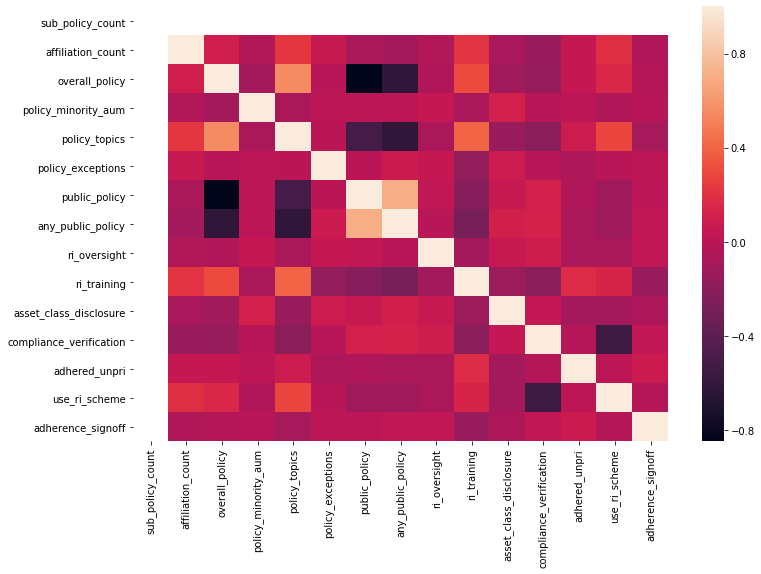

In [349]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(ax=ax, data=x_correl)
plt.show()

In [350]:
#Remove high correlation metrics: any_public_policy, policy_topics, and overall_policy in favor of public_policy and get rid of compliance_verification in favor of use_ri_scheme
X.drop(['overall_policy','policy_topics','any_public_policy','compliance_verification'], axis=1, inplace=True)
X.columns

Index(['sub_policy_count', 'affiliation_count', 'policy_minority_aum',
       'policy_exceptions', 'public_policy', 'ri_oversight', 'ri_training',
       'asset_class_disclosure', 'adhered_unpri', 'use_ri_scheme',
       'adherence_signoff'],
      dtype='object')

In [351]:
X_y = X.copy()
X_y['ifc'] = y

In [352]:
# X_y = X_y.reset_index()
X_y['Preqin Name'] = gp_score['Preqin Official']
X_y.head()

,sub_policy_count,affiliation_count,policy_minority_aum,policy_exceptions,public_policy,ri_oversight,ri_training,asset_class_disclosure,adhered_unpri,use_ri_scheme,adherence_signoff,ifc,Preqin Name
1,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.0,0,Access Capital Partners
3,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.0,0,PineBridge Investments
5,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0.0,0,Ardian
7,1.0,3,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,0,Coller Capital
9,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,1,0,1.0,0,GCM Grosvenor


In [354]:
X_y.loc[X_y['ifc'] == 1]

,sub_policy_count,affiliation_count,policy_minority_aum,policy_exceptions,public_policy,ri_oversight,ri_training,asset_class_disclosure,adhered_unpri,use_ri_scheme,adherence_signoff,ifc,Preqin Name
76,1.0,2,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1.0,1,Rock Creek Group
84,1.0,2,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.0,1,BNP Paribas Asset Management
128,1.0,3,0.0,0.0,0.0,0.0,1.0,0.0,1,0,1.0,1,Sarona Asset Management
170,1.0,3,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0,1,Community Investment Management
233,1.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,1,Norfund
289,1.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.0,1,Actis
326,1.0,5,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0.0,1,UBS Asset Management
432,1.0,3,0.0,0.0,0.0,0.0,1.0,0.0,1,1,1.0,1,BlueOrchard Finance
452,1.0,3,0.0,0.0,1.0,0.0,1.0,0.0,1,0,0.0,1,LeapFrog Investments
552,1.0,2,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0.0,1,Amundi


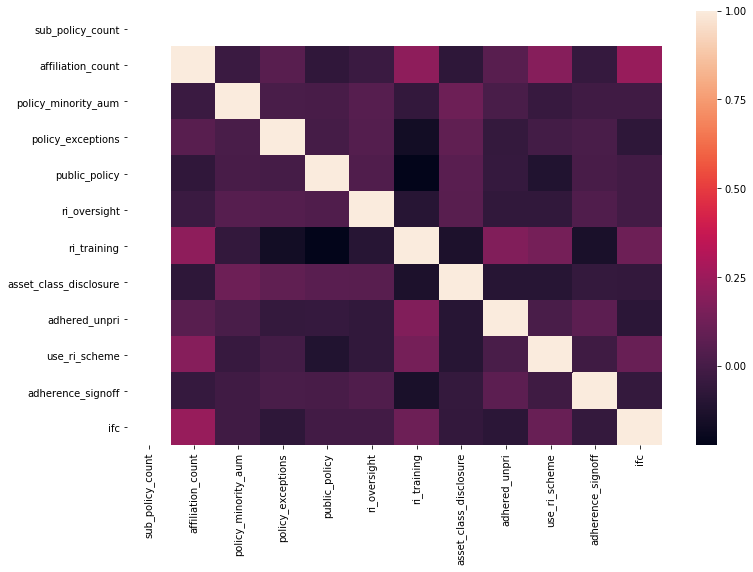

In [355]:
xy_correl = X_y.corr()
fig2, ax2 = plt.subplots(figsize=(12,8))
sns.heatmap(ax=ax2, data=xy_correl)
plt.show()

In [356]:
y.sum()

11

In [357]:
#Baseline prediction
1- (y.sum() / y.count())

0.9799270072992701

## Model Selection

Our interest is not in applying an impact label on companies, but in finding firms that are impact-like. Users will reject an impact label that's not official, but they will accept a manager scorecard that points to good qualities that lie beneath the surface. Therefore, we're looking for a supervised model that points towards the IFC (y).

An unsupervised approach starts from the position that I don't know what an impact firm is and I want the model out labeling. This isn't as appropriate here--we don't want a new classification, there's too many already. We want to grade entities on the most stringent classification to simplify all the schemes onto a single grading system.

For supervised models, the scikit-learn algorithm cheat sheet points to knn due to smaller size of data and non-textual observations. This model may be a good choice because scale of features is not an issue with small counts and dummy variables prevailing, and because I have applied business logic to ensure all features are relevant. 

#### KNN

In [358]:
from sklearn import datasets, neighbors, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [395]:
X.shape

(548, 11)

k-folds is difficult with such a low y sample. I also need more balanced train/test split to ensure enough y's in each group.

In [448]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
print(y_train.sum(), y_test.sum())

5 6


Given low number of IFC OPIC members, we want to minimize biasing on the small sample so we want to minimize bias with minimum k=3

In [449]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [450]:
y_pred_knn = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_knn)))

0.9781021897810219


Accuracy isn't very helpful since the probability of a firm not being an Impact firm is very high: 98%. Therefore, we must look to precision, recall, and the F1 score.

In [451]:
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [452]:
metrics.f1_score(y_test, y_pred_knn)

0.25

F1 doesn't tell us much on its own because we're not comparing multiple models. But I do care more about the (inverse) false negative rate (recall score) versus the true positive rate (precision). I don't care about precision because IFC OPIC is classification isn't the goal; the goal is to find companies that are similar to IFC OPIC but are not IFC OPIC. 

In [453]:
print("Recall: ",metrics.recall_score(y_test, y_pred_knn),", Precision: ",metrics.precision_score(y_test, y_pred_knn))

Recall:  0.16666666666666666 , Precision:  0.5


Don't need to do standard scaler since scaling is not an issue with our binary and small count features

In [401]:
len(y_pred_knn)

274

In [402]:
# Calculate TRAINING ERROR and TESTING ERROR for K=1 through 100.

k_range = list(range(1, 10))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 100 (inclusive).
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_knn = knn.predict(X)
    training_accuracy = metrics.accuracy_score(y, y_pred_knn)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_knn = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
    testing_error.append(1 - testing_accuracy)

In [403]:
# Create a DataFrame of K, training error, and testing error.
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
df.head()

,training error,testing error
K,,
9,0.020073,0.014599
8,0.020073,0.014599
7,0.020073,0.014599
6,0.020073,0.014599
5,0.020073,0.014599


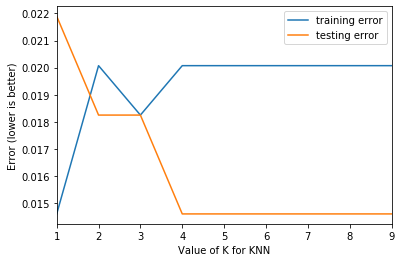

In [404]:
# Plot the relationship between K (HIGH TO LOW) and both TRAINING ERROR and TESTING ERROR.
df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

#### Logistic Regression for interpretability

In [377]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [378]:
logreg.fit(X,y)
pred = logreg.predict(X)

C:\Users\michael.amenta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [381]:
logreg.intercept_

array([-1.68398015])

In [379]:
logreg.coef_

array([[-1.68398015,  0.52019966, -0.07328884, -1.10183001, -0.05222224,
        -0.17190231,  0.75672037, -0.8225312 , -1.50562745,  0.46341065,
        -0.44703875]])

In [380]:
X.columns

Index(['sub_policy_count', 'affiliation_count', 'policy_minority_aum',
       'policy_exceptions', 'public_policy', 'ri_oversight', 'ri_training',
       'asset_class_disclosure', 'adhered_unpri', 'use_ri_scheme',
       'adherence_signoff'],
      dtype='object')

Need to run regularization to make meaningful

#### Decision Trees

Decision trees may also be interesting for high interpretability (rather than random forests) but it's not a good choice due to highly unbalanced classes and small sample size.

In [415]:
from sklearn.tree import DecisionTreeClassifier

In [416]:
treereg = DecisionTreeClassifier(max_depth=3, random_state=1)
treereg.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [417]:
print((metrics.accuracy_score(y_test, y_pred_treereg)))

0.9817518248175182


In [418]:
y_pred_treereg = treereg.predict(X_test)
y_pred_treereg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

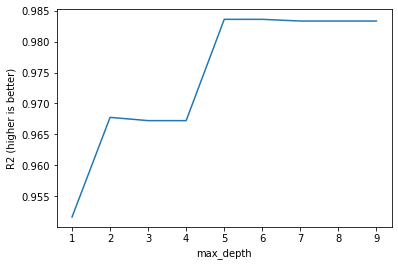

In [419]:
# List of values to try:
max_depth_range = list(range(1, 10))

# List to store the average RMSE for each value of max_depth:
R2_scores = []

# Use LOOCV with each value of max_depth.
for depth in max_depth_range:
    R2_scores = cross_val_score(treereg, X, y, cv=9)

# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, R2_scores);
plt.xlabel('max_depth');
plt.ylabel('R2 (higher is better)');

In [420]:
metrics.f1_score(y_test, y_pred_treereg)

0.0

In [421]:
print("Recall: ",metrics.recall_score(y_test, y_pred_treereg),", Precision: ",metrics.precision_score(y_test, y_pred_treereg))

Recall:  0.0 , Precision:  0.0


### Phase 2: Solve for Large vs. Small Company Bias & Improving Matching Model

#### Improve Matching Model
1. Add 'Basic Information' page (79894dbc337a40828d895f9402aa63de) to webscrape to capture AUM and Assets in USD fields. I have since added this suffix to the web scrape notebook.
2. Add AUM data to the Preqin download
3. Include these two columns as additional factors in a classification model using both name distance and AUM % difference (rather than just name distance). How do I then build a model that blends multiple scores? If I bueld a classification model, I need to specify that the classification is the ~3,400 Preqin names.

#### Solve for Large v Small Company Bias
1. Keep AUM information as a feature and do ESA to find correlations/visualizations on relationship between AUM and Y
2. Split universe into n groups and make n different models for each size group. Or add some size neutralizer factor as part of feature engineering process.

#### Miscellaneous Fixes
1. Add frequency of setting RI goals and objectives: d0cc681dfa4d45dca3d70f04bc27d284 and swap it with b874458d0ecd4101869208a1fc7bab12, which has no useful information. I have since made this change to the web scrape notebook.
2. Are features dropped because they have exactly the same column name? It seems that way in b8be094467a0406ead601634b02a60c6, b2a82182cc14473b90b72f6bb504fae0, and 8f2ede8902574ce5afc919af9e05c4e0--no duplicate columns exist in my csv. If not, how do you distinguish column selection of identical column names? If so, need to rescrape with new names and make features for 'no oversight/accountability...' for each of the roles below board level.
3. Dropdowns weren't considered on 57749b1a39a14fe6942aabb90698b3c1. Choice of Basic, Moderate, or Advanced all returned '1' for first question and weren't subsequently pulled. Need to incorporate this logic into question_grabber.
4. Next level feature selection through Ridge model, recursive feature elimination, or tree-based feature selection
